# Visulizing Earnings Based On College Majors


### Introduction

In this project, we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.

The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Some of the columns in the dataset are as follows:
* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:
- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominatly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots
    
We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.    

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read in dataset to start exploring the data
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[0] # return the first row 


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# get familiar with how the data is structured
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [8]:
# number of rows
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [9]:
# Drop rows with missing value by pd.DataFrame.dropna(axis=0)
# if (axis=1) means removing any column with N/A value
recent_grads = recent_grads.copy().dropna(axis=0)

In [11]:
# use describe() to check if counts is 172
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

172


### Generate scatter plots in seperate cells to explore the following relationship

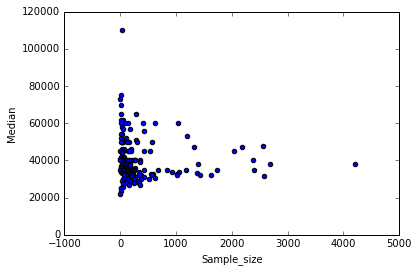

In [10]:
# Sample_size & Median
recent_grads.plot(x="Sample_size", y="Median", kind="scatter")

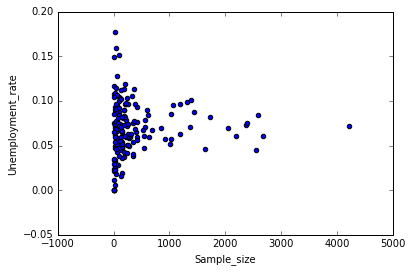

In [11]:
# Sample_size & Unemplyment_rate
recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter")

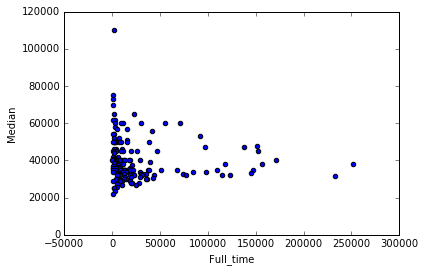

In [12]:
# Full_time & Median
recent_grads.plot(x="Full_time", y="Median", kind="scatter")

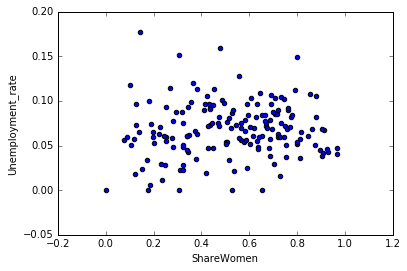

In [13]:
# ShareWomen & Unemployment_rate
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter")

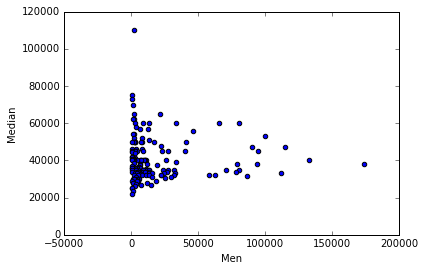

In [14]:
# Men & Median
recent_grads.plot(x="Men", y="Median", kind="scatter")

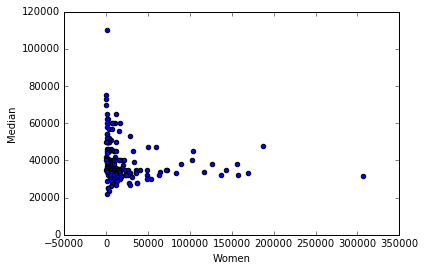

In [15]:
# Women & Median
recent_grads.plot(x="Women", y="Median", kind="scatter")

### Use the plots to explore the following questions
* Do students in more popular majors make more money?

* Do students that majored in subjects that were majority female make more money?

* Is there any link between the number of full-time employees and median salary?

In [16]:
# 越流行的系所畢業能賺更多錢嗎？
# 大多數女性主修的系所賺更多錢嗎？
# 全職員工的數量與薪資中位數有關嗎？

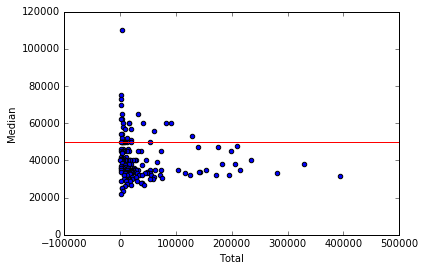

In [26]:
# 1. Do students in more popular majors make more money?
# make scatter plot with total and median column
recent_grads.plot(x="Total", y="Median", kind="scatter")
plt.axhline(y=50000, c='r')



I use the data from "number of students" as standard of popularity, and "median" as ability to make money.

You can see the more popular the major is, the less money you'll make. However, if the major is not popular, you have chances to either make a lot of money or make less money which might depends on the importance of major in labor markets.

This can be explaned with laws of economic - supply and demand. If the major is already saturated in society, the employer have many options to adopt and they have the right to select the employees of lower wages.
If your major is what society extremly needs but rarely found, you have higher oppurtunity to make more money because the supply in labor market is lower than demand.

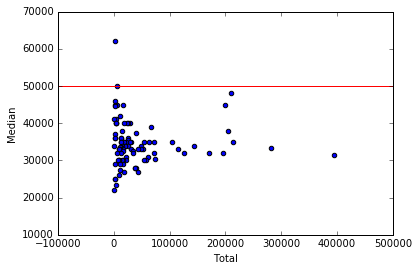

In [27]:
# 2. Do students that majored in subjects that were
# majority female make more money?
women_majority = recent_grads[recent_grads["ShareWomen"]>0.5]
women_majority.plot(x="Total", y="Median", kind="scatter")
plt.axhline(y=50000, c='r')


If we set median of $40000 as a standard of making more money as above. The conclusion is familiar with last question. We can see the more popular the major is, supply of labor markets increases and demand remain the same. This will make company hire a person from popular majors with lower wage.

However, if the major is less popular, we can see when total students is near 0, there's only one major who's salary is overy $40000.

If you put first 2 questions together, you'll find the majors which were majority male make more money above $50000 than those were majority female.

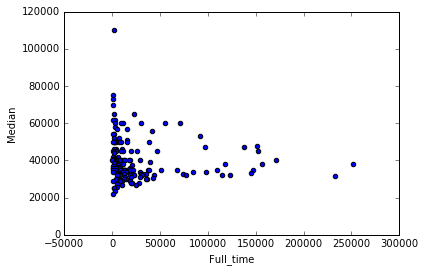

In [19]:
# 3.Is there any link between the number of full-time employees 
# and median salary?
recent_grads.plot(x="Full_time", y="Median", kind="scatter")

Although some company with less full-time employees still get low median, it's more possible to get higher salaries in company with less full-time employees.

### Pandas, Histograms

Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:

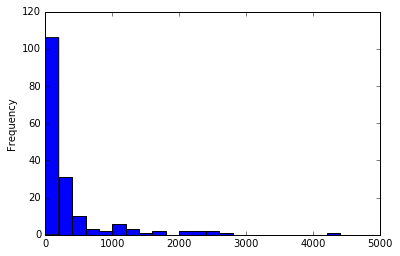

In [20]:
# Sample_size - Sample size (unweighted) of full-time
recent_grads["Sample_size"].plot(kind="hist", bins=25, range=(0,5000))

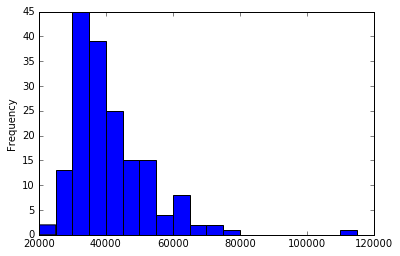

In [21]:
# Median - Median salary of full-time, year-round workers
recent_grads["Median"].plot(kind="hist", bins=20, range=(20000,120000))

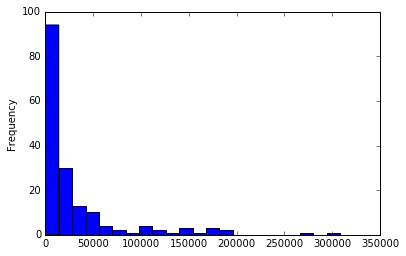

In [22]:
# Employed - Number employed
recent_grads["Employed"].plot(kind="hist", bins=25, range=(0,350000))

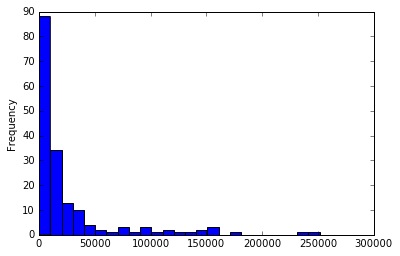

In [23]:
# Full_time - Number employed 35 hours or more
recent_grads["Full_time"].plot(kind="hist", bins=25)

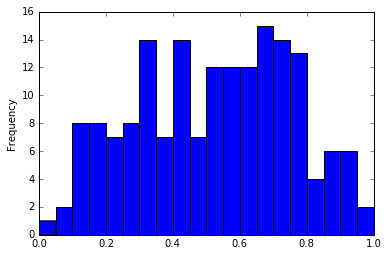

In [24]:
# ShareWomen - Women as share of total
recent_grads["ShareWomen"].plot(kind="hist", bins=20, range=(0,1))

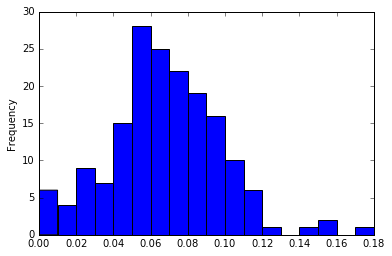

In [25]:
# Unemployment_rate
recent_grads["Unemployment_rate"].plot(kind="hist",bins=18,range=(0,0.18))

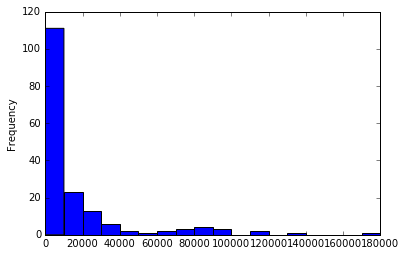

In [26]:
# Men - Male graduates
recent_grads["Men"].plot(kind="hist",bins=18, range=(0,180000))

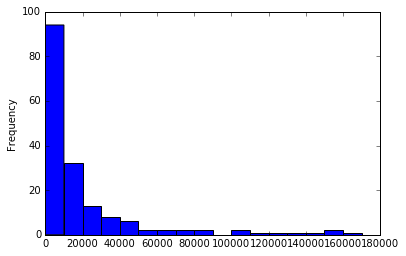

In [27]:
# Women - Female graduates
recent_grads["Women"].plot(kind="hist",bins=18, range=(0,180000))

### Use the plots to explore the following questions:
* What percent of majors are predominantly male? Predominantly female?
* What's the most common median salary range?

43 % majors are predominantly male
57 % majors are predominantly female


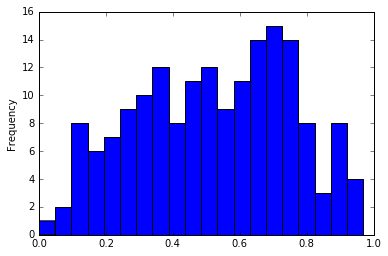

In [42]:
# 1. What percent of majors are predominantly male? Predominantly female?
recent_grads["ShareWomen"].plot(kind="hist", bins=20)

# predominantly male count: 74
# 1+2+8+6+7+9+10+12+8+11

# predominantly female count: 98
# 12+9+11+14+15+14+8+3+8+4

# total count: 172
# 74+92

print(str(round(74/172*100)), "% majors are predominantly male")
print(str(round(98/172*100)), "% majors are predominantly female")

In [43]:
# If we want to calculate the percentage of majors of 
# predominantly male or predominantly female
# it's better to use boolean filter and calculate

total_number = recent_grads.shape[0]
num_more_man = sum(recent_grads["ShareWomen"]<0.5)
num_more_women = sum(recent_grads["ShareWomen"]>0.5)

male_percentage = num_more_man / total_number * 100
female_percentage = num_more_women / total_number * 100

print(str(round(male_percentage)),'% majors are predominantly male')
print(str(round(female_percentage)),'% majors are predominantly female')


44 % majors are predominantly male
56 % majors are predominantly female


The most common median salary ranges from 20k to 60k


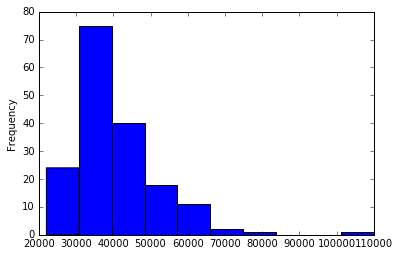

In [44]:
# 2. What's the most common median salary range?
recent_grads["Median"].plot(kind="hist")

print("The most common median salary ranges from 20k to 60k")

### Pandas, Scatter Matrix Plot


In [45]:
from pandas.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbad06e6550>,
      dtype=object)

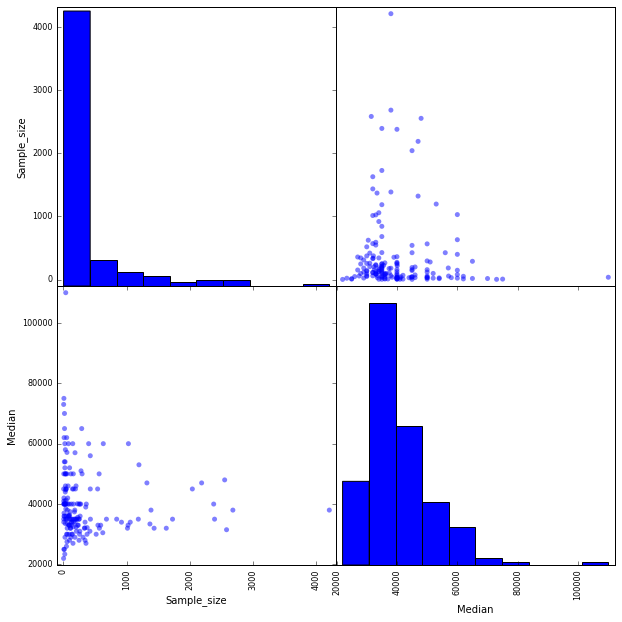

In [46]:
# create a 2 by 2 scatter matrix with "Sample_size" and "Median"
scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize=(10,10), s=100)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbacebdf128>,
      dtype=object)

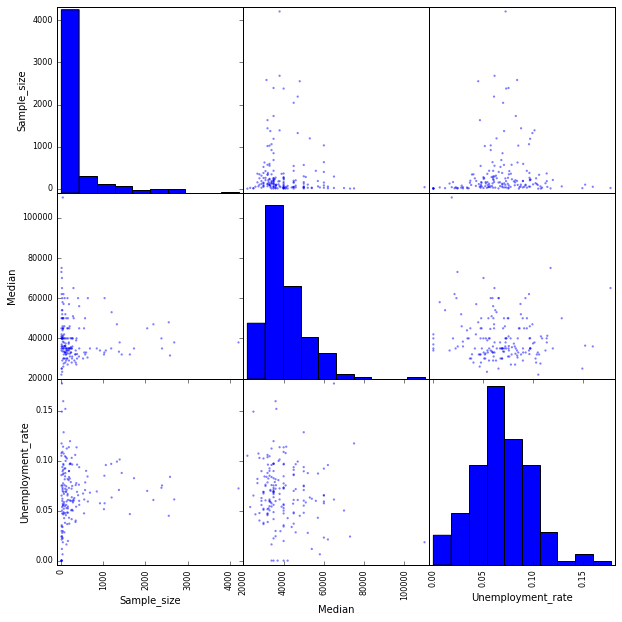

In [47]:
# Create a 3 by 3 scatter matrix plot using the columns below
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize=(10,10))

### Pandas, Bar Plots

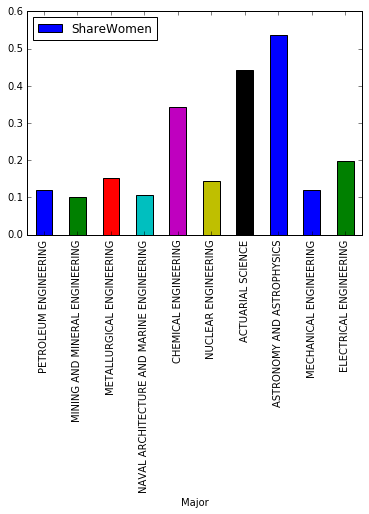

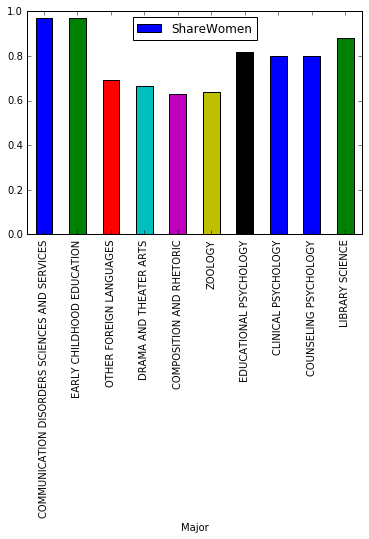

In [48]:
# Use bar plots to compare the percentages of women
# from the first ten rows and last ten rows
recent_grads[:10].plot.bar(x="Major",y="ShareWomen")
recent_grads[-10:].plot.bar(x="Major",y="ShareWomen")
plt.show()

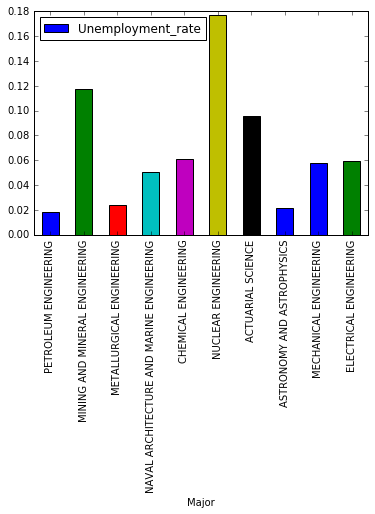

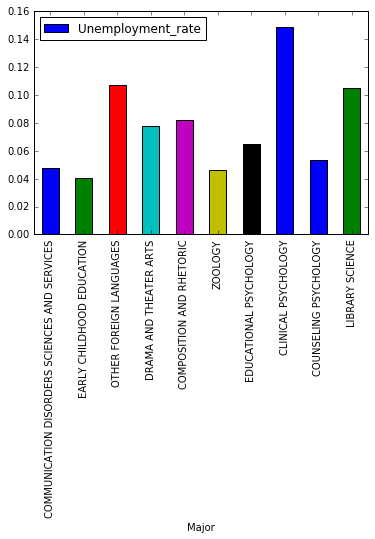

In [49]:
# Use bar plots to compare the unemployment rate from 
# the first ten rows and last ten rows
recent_grads[:10].plot.bar(x="Major", y="Unemployment_rate")
recent_grads[-10:].plot.bar(x="Major", y="Unemployment_rate")

### Explore more...
* Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
* Use a box plot to explore the distributions of median salaries and unemployment rate.
* Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

#### Comparing the number of men and women in each category

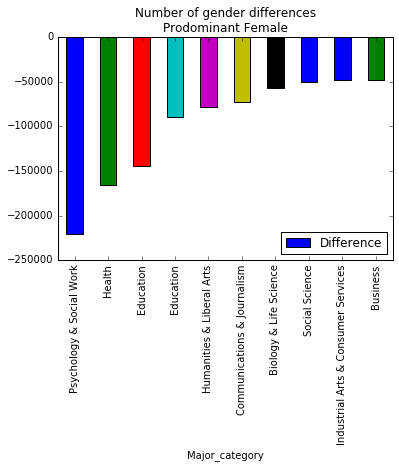

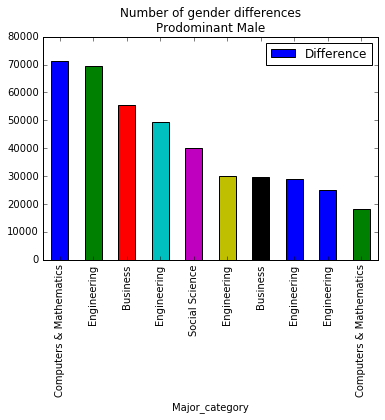

In [84]:
# create a new column which equals to number of male students subtract
# number of female students
recent_grads["Difference"] = recent_grads["Men"] - recent_grads["Women"]
predominant_women = recent_grads.sort_values("Difference", ascending=True).head(10)
predominant_men = recent_grads.sort_values("Difference", ascending=False).head(10)

predominant_women.plot.bar(x="Major_category", y="Difference", title="Number of gender differences\nProdominant Female")
predominant_men.plot.bar(x="Major_category", y="Difference",title="Number of gender differences\nProdominant Male")
plt.show()

We subtract number of male students by number of female students and assign values to a new column `Difference`, so we could make a bar plot to review which major category consists huge difference between male and female.

In predominant female plot, the most difference lie in Psychology&Social Work, Health and Education which categories are believed to require more patience. Without doubt men can also do well in these fields, but stats show that students number of female are much more than male's.

As for predominant male plot, the most difference lie in Computers & Mathematics, Engineering and Business. Stats show us the evidence male loves these fields more than female.

#### Explore the distribution of median salaries and unemployment rate

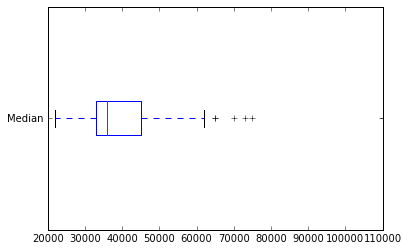

In [79]:
# Median Salaries
recent_grads["Median"].plot.box(vert=False)

Most salaries median lie between 30000 to about 45000, the salaries median over 60000 are detected as outliers.

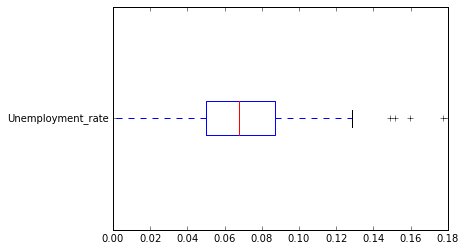

In [80]:
# unemployment_rate
recent_grads["Unemployment_rate"].plot.box(vert=False)

The unemployment rates lie between 5% to 9%, there're some data with over 13% unemployment rate which is detected as outliers.

### Hexagonal
Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually. Let's plot those scatter plots from earlier that had dense plots.

#### `Sample_size` and `Median`

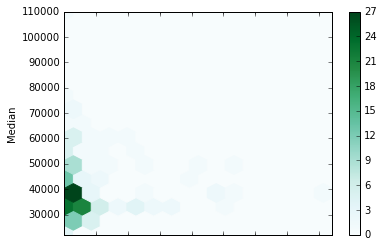

In [83]:
recent_grads.plot.hexbin(x="Sample_size", y="Median", gridsize=15)

#### `Sample_size` and `Unemployment_rate`

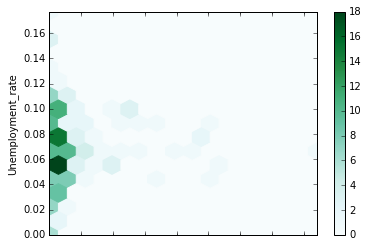

In [84]:
recent_grads.plot.hexbin(x="Sample_size", y="Unemployment_rate", gridsize=15)

The mean of unemployment rate is about 6%, we can verify with describe()

In [89]:
recent_grads["Unemployment_rate"].describe()

count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64

#### `Full_time` and `Median`

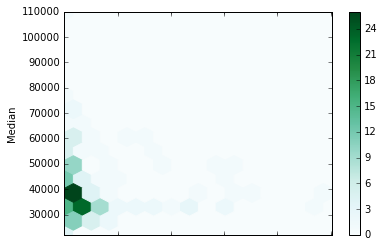

In [85]:
recent_grads.plot.hexbin(x="Full_time", y="Median", gridsize=15)

#### `ShareWomen` and `Unemployment_rate`

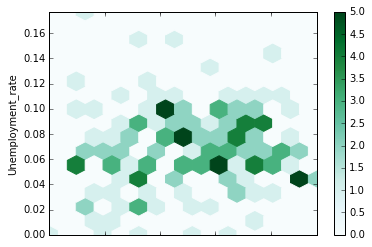

In [86]:
recent_grads.plot.hexbin(x="ShareWomen", y="Unemployment_rate", gridsize=15)

#### `Men` and `Women`

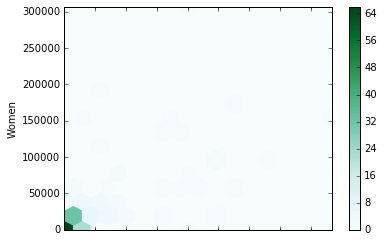

In [87]:
recent_grads.plot.hexbin(x="Men", y="Women", gridsize=15)

#### `Women` and `Median`

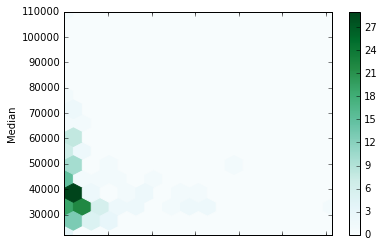

In [88]:
recent_grads.plot.hexbin(x="Women", y="Median", gridsize=15)